In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos generales
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 5)

# Cargar dataset
df = pd.read_csv("../data/happiness_all.csv")

# Vista rápida
df.head()

,Country,Region,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Perceptions_of_Corruption
0,Switzerland,Western Europe,2015,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,Iceland,Western Europe,2015,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,Denmark,Western Europe,2015,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,Norway,Western Europe,2015,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,Canada,North America,2015,7.427,1.326,1.323,0.906,0.633,0.458,0.330


In [11]:
# Dimensiones, columnas y tipos
print("Dimensiones:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)

# Revisión de nulos y duplicados
print("\nValores nulos por columna:")
print(df.isna().sum())

dupes = df.duplicated(subset=["Country", "Year"]).sum()
print("\nDuplicados por (Country, Year):", dupes)

# Estadísticas descriptivas globales
df.describe().T


Dimensiones: (782, 10)

Columnas: ['Country', 'Region', 'Year', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']

Tipos de datos:
Country                       object
Region                        object
Year                           int64
Happiness_Score              float64
GDP_per_Capita               float64
Social_Support               float64
Healthy_Life_Expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions_of_Corruption    float64
dtype: object

Valores nulos por columna:
Country                      0
Region                       0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_Corruption    0
dtype: int64

Duplicados por (Country, Year): 0


,count,mean,std,min,25%,50%,75%,max
Year,782.0,2016.993606,1.417364,2015.000,2016.00000,2017.0000,2018.00000,2019.000
Happiness_Score,782.0,5.379018,1.127456,2.693,4.50975,5.3220,6.18950,7.769
GDP_per_Capita,782.0,0.916040,0.407357,0.000,0.60650,0.9820,1.23625,2.096
Social_Support,782.0,1.078395,0.329538,0.000,0.86925,1.1245,1.32725,1.644
Healthy_Life_Expectancy,782.0,0.612417,0.248298,0.000,0.44025,0.6470,0.80800,1.141
Freedom,782.0,0.411090,0.152891,0.000,0.31000,0.4310,0.53100,0.724
Generosity,782.0,0.218579,0.122336,0.000,0.13000,0.2020,0.27875,0.838
Perceptions_of_Corruption,782.0,0.125423,0.105742,0.000,0.05425,0.0910,0.15575,0.552


C:\Users\fabia\AppData\Local\Temp\ipykernel_3636\2271690378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values, palette="viridis")


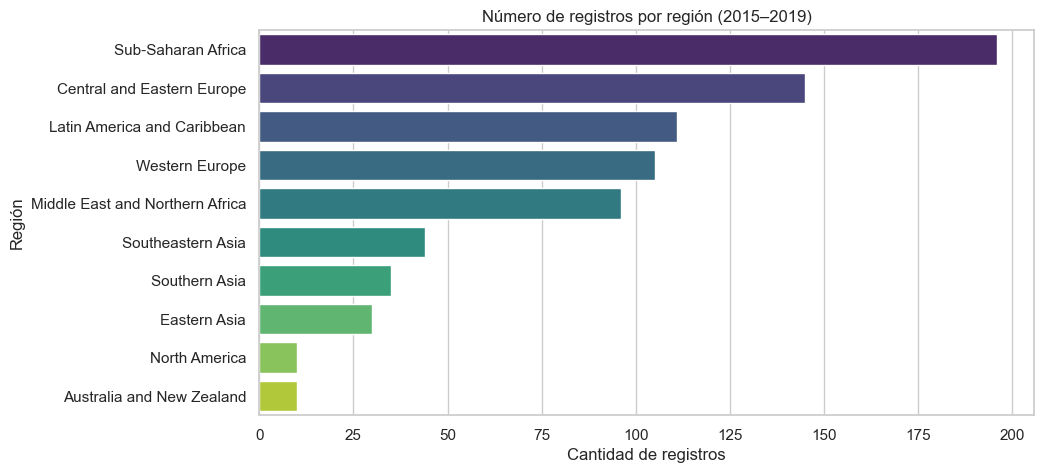

C:\Users\fabia\AppData\Local\Temp\ipykernel_3636\2271690378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="muted")


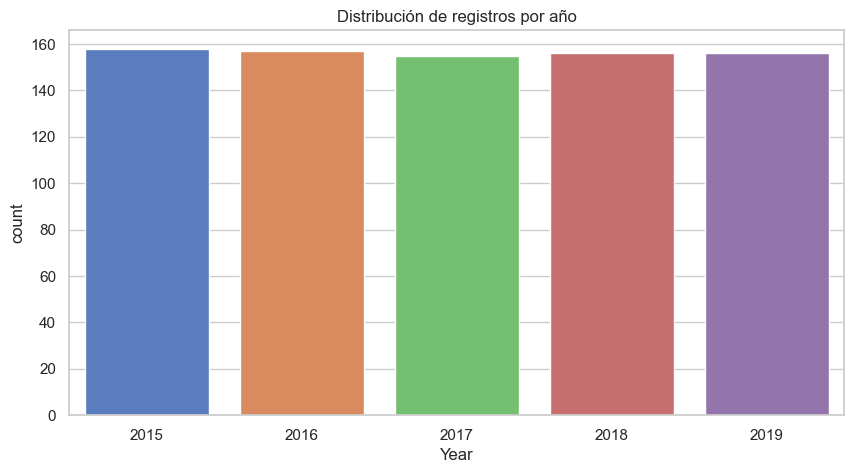

In [12]:
# Conteo de países por región
region_counts = df["Region"].value_counts()
sns.barplot(y=region_counts.index, x=region_counts.values, palette="viridis")
plt.title("Número de registros por región (2015–2019)")
plt.xlabel("Cantidad de registros")
plt.ylabel("Región")
plt.show()

# Conteo de registros por año
sns.countplot(data=df, x="Year", palette="muted")
plt.title("Distribución de registros por año")
plt.show()


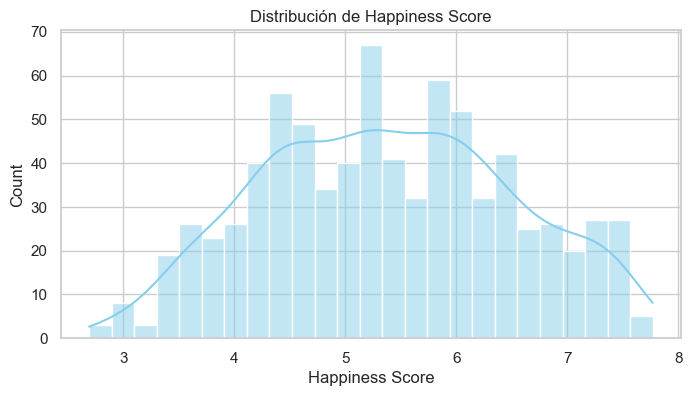

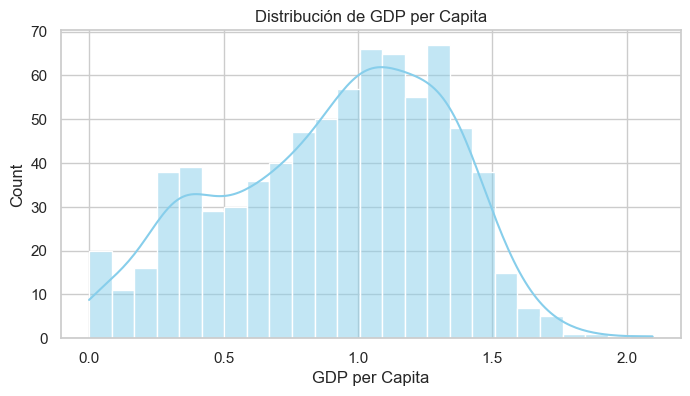

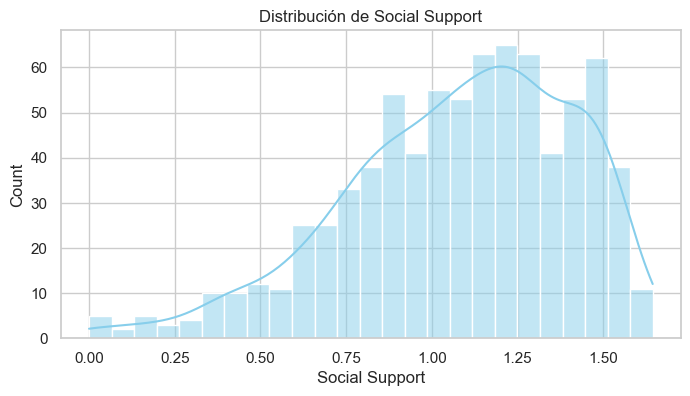

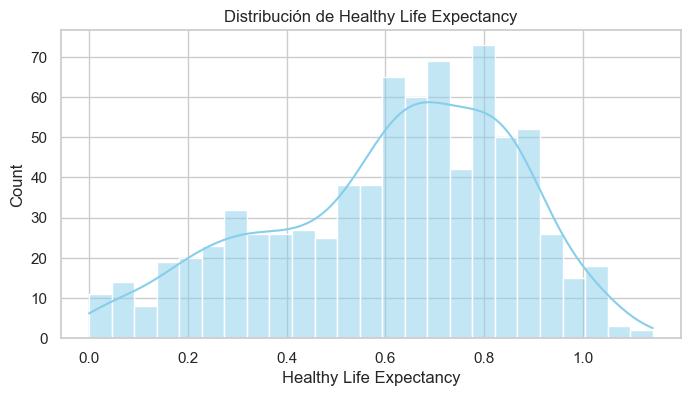

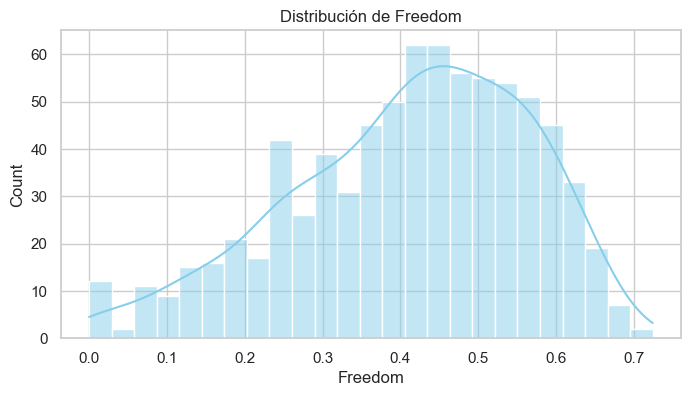

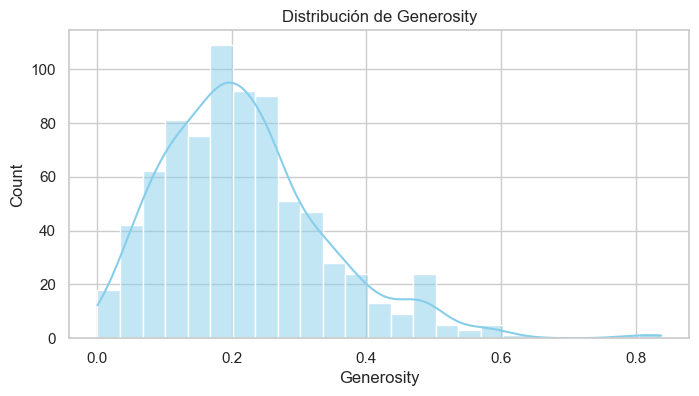

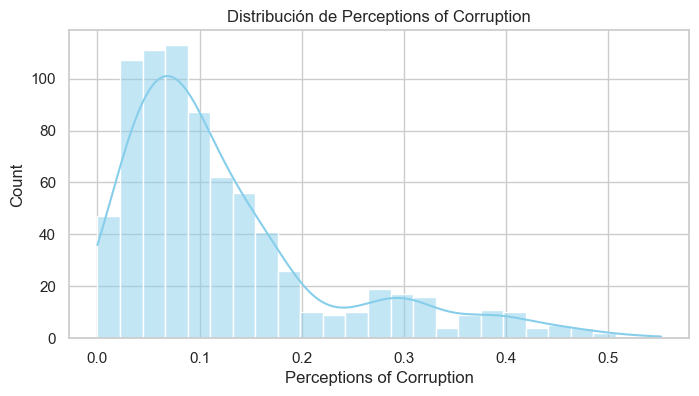

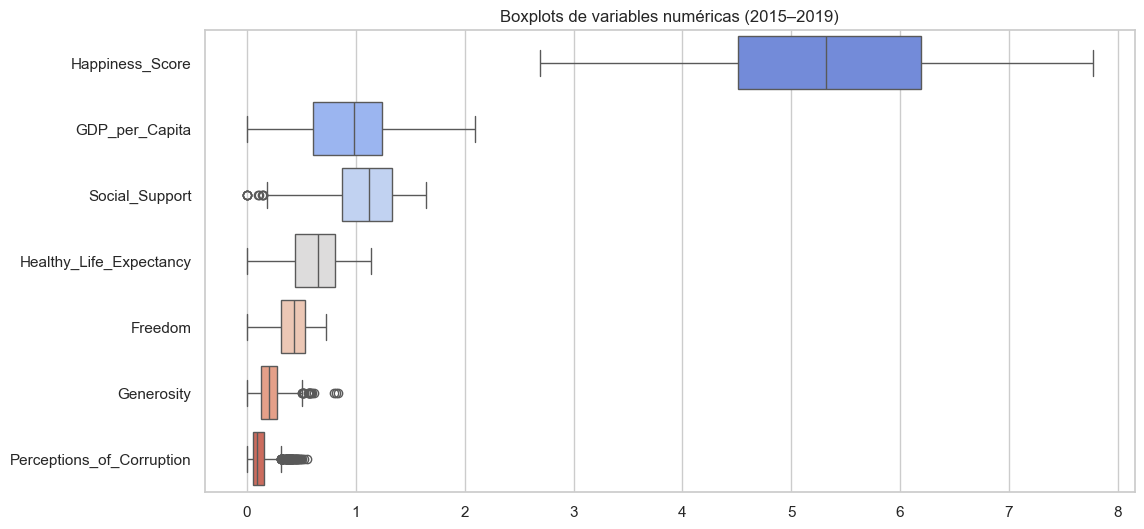

In [13]:
numeric_cols = [
    "Happiness_Score", "GDP_per_Capita", "Social_Support",
    "Healthy_Life_Expectancy", "Freedom", "Generosity",
    "Perceptions_of_Corruption"
]

# Histogramas con densidad
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=25, kde=True, color="skyblue")
    plt.title(f"Distribución de {col.replace('_', ' ')}")
    plt.xlabel(col.replace('_', ' '))
    plt.show()

# Boxplots generales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient="h", palette="coolwarm")
plt.title("Boxplots de variables numéricas (2015–2019)")
plt.show()


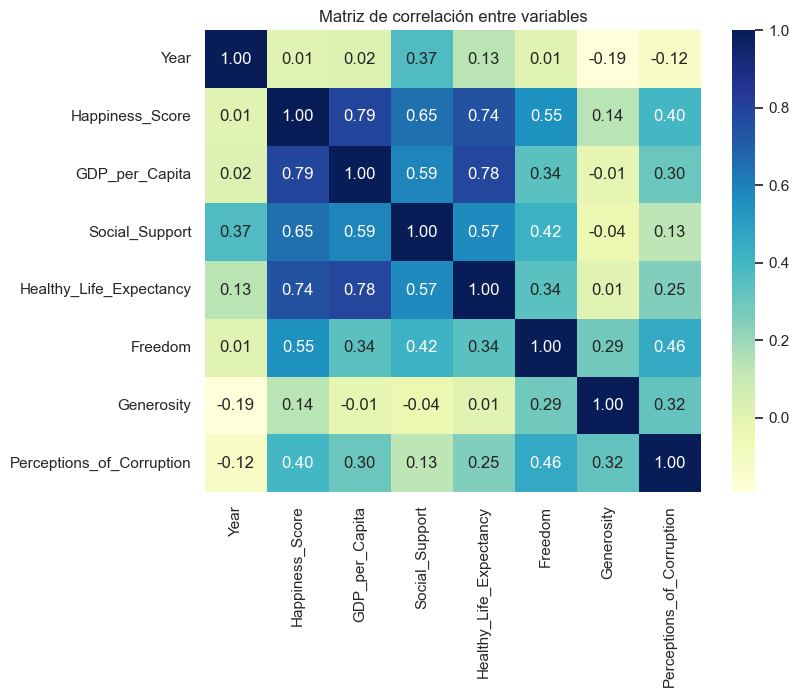

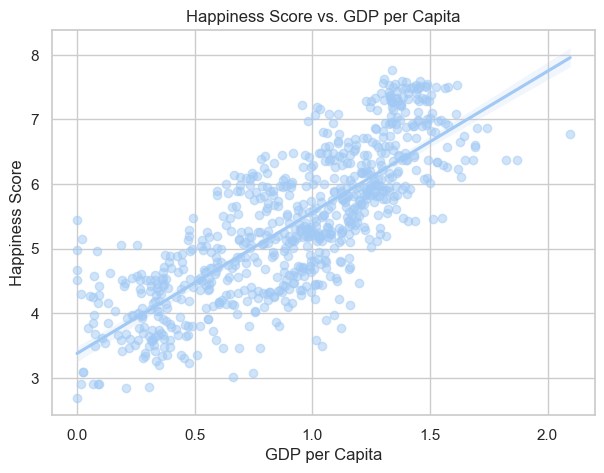

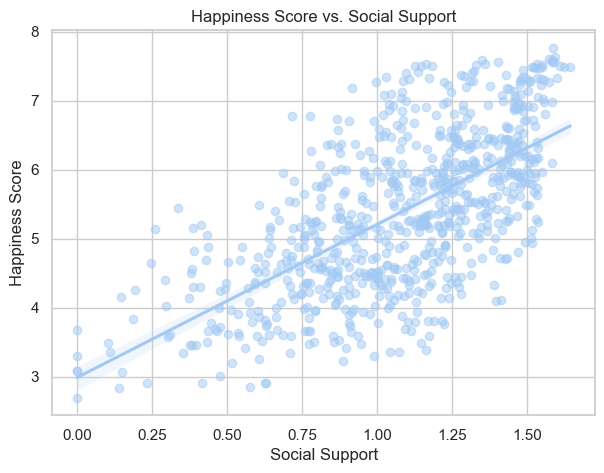

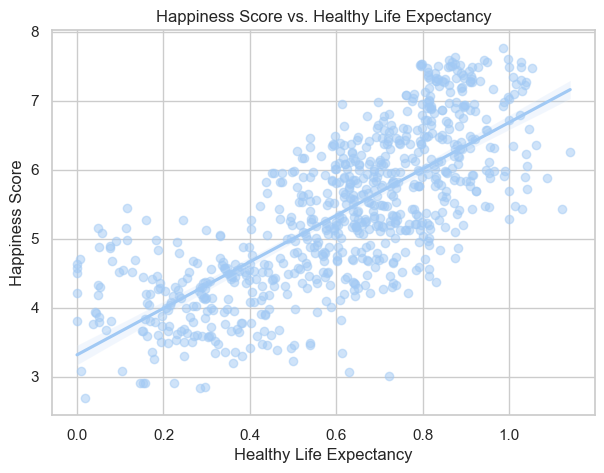

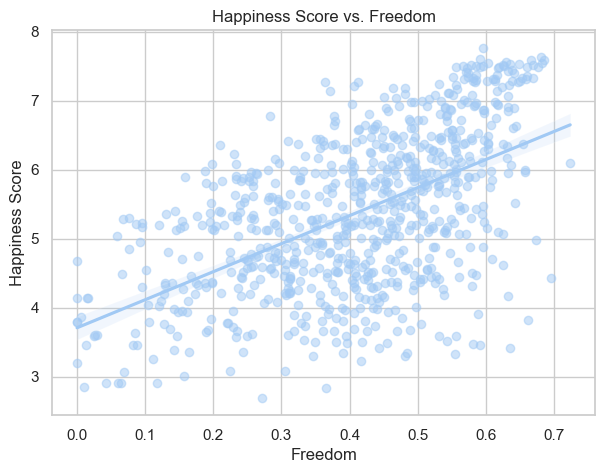

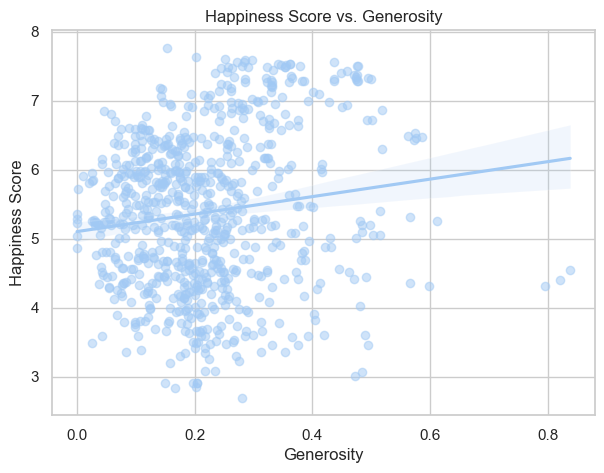

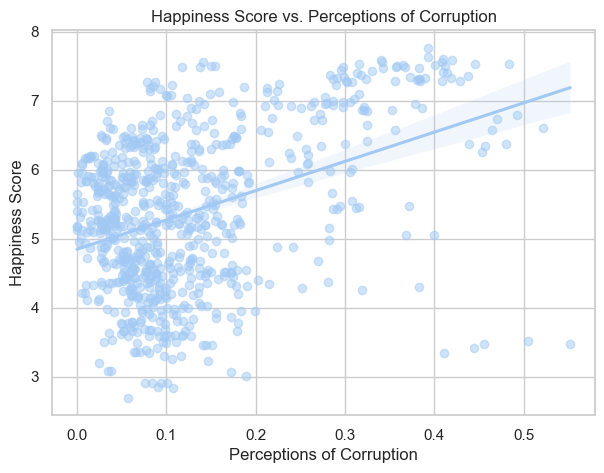

In [14]:
# Matriz de correlación
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

# Scatterplots: Happiness vs. cada variable explicativa
for col in numeric_cols[1:]:
    plt.figure(figsize=(7, 5))
    sns.regplot(x=col, y="Happiness_Score", data=df, scatter_kws={"alpha":0.5})
    plt.title(f"Happiness Score vs. {col.replace('_', ' ')}")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Happiness Score")
    plt.show()


C:\Users\fabia\AppData\Local\Temp\ipykernel_3636\2392562174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="magma")


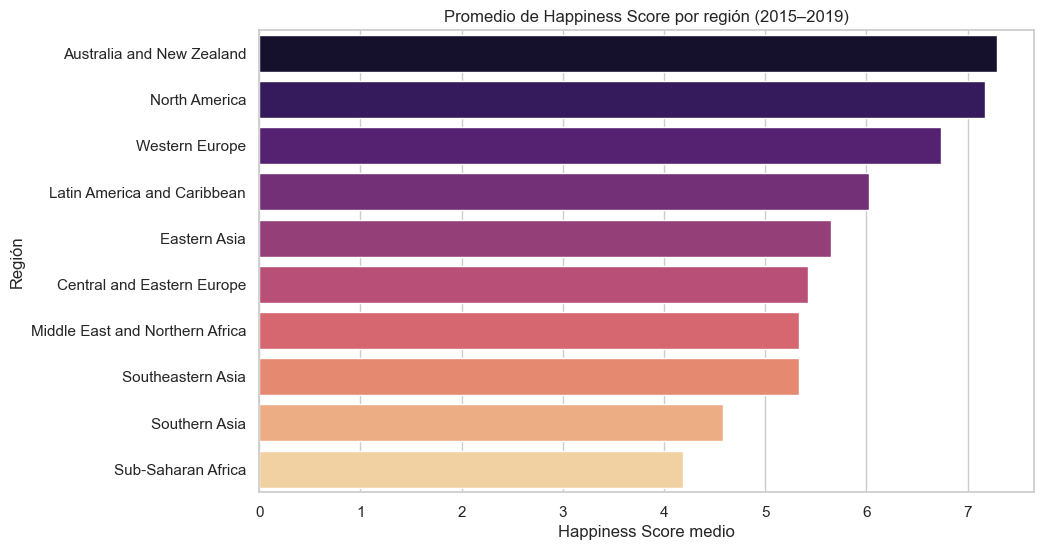

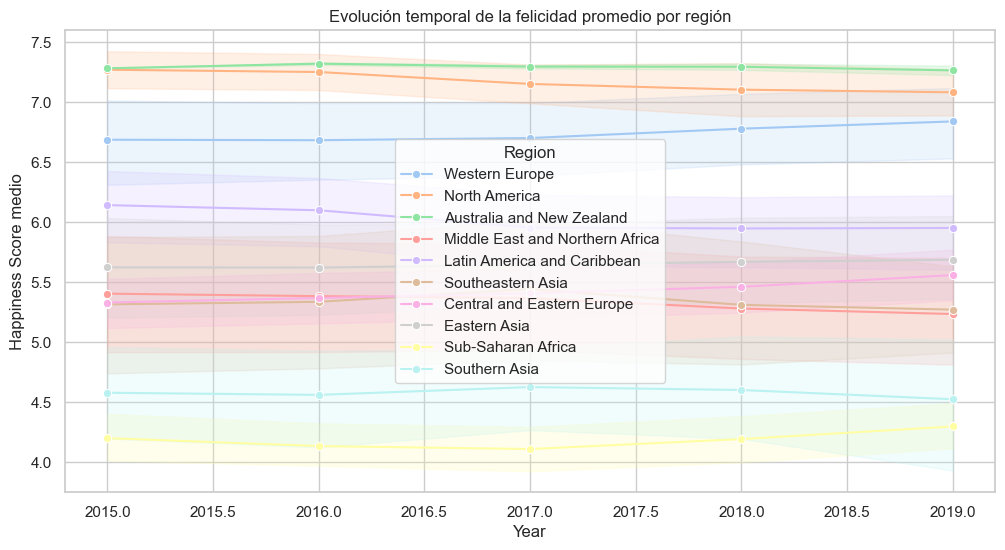

C:\Users\fabia\AppData\Local\Temp\ipykernel_3636\2392562174.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, ax=axes[0], palette="Greens_r")
C:\Users\fabia\AppData\Local\Temp\ipykernel_3636\2392562174.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom10.values, y=bottom10.index, ax=axes[1], palette="Reds_r")


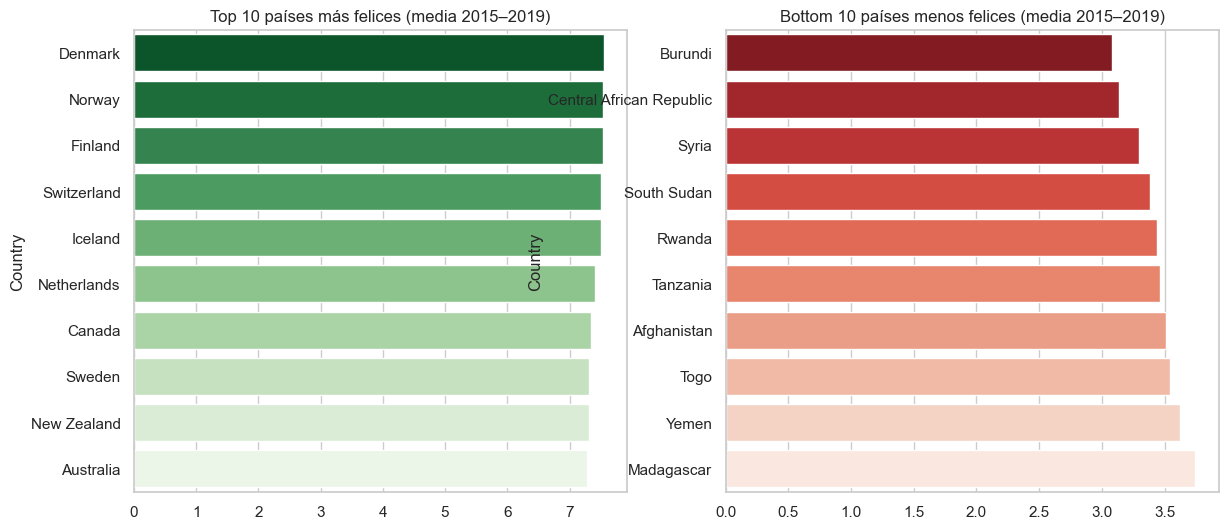

In [15]:
# Promedio de felicidad por región
region_mean = df.groupby("Region")["Happiness_Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="magma")
plt.title("Promedio de Happiness Score por región (2015–2019)")
plt.xlabel("Happiness Score medio")
plt.ylabel("Región")
plt.show()

# Evolución temporal por región
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Happiness_Score", hue="Region", marker="o")
plt.title("Evolución temporal de la felicidad promedio por región")
plt.ylabel("Happiness Score medio")
plt.show()

# Top y bottom 10 países
top10 = df.groupby("Country")["Happiness_Score"].mean().nlargest(10)
bottom10 = df.groupby("Country")["Happiness_Score"].mean().nsmallest(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=top10.values, y=top10.index, ax=axes[0], palette="Greens_r")
axes[0].set_title("Top 10 países más felices (media 2015–2019)")

sns.barplot(x=bottom10.values, y=bottom10.index, ax=axes[1], palette="Reds_r")
axes[1].set_title("Bottom 10 países menos felices (media 2015–2019)")
plt.show()
